# Spectural Clustering using Numpy/Scipy/Networkx

Graphs are data structures that represent the relationships between individual data points. Each point is represented as a node, and the relationship between any two points is represented by an edge. 

The spectural clustering is a useful clustering method for graph partitioning that helps us find general patterns within different nodes based on their inter-relationship. 

In [1]:
import numpy as np
import networkx as nx
import numpy.linalg as la
import scipy.cluster.vq as vq
import matplotlib.pyplot as plt

%matplotlib inline

For demonstration purposes, we use a simulated graph with 100 nodes that is created using the power-law. 

In [45]:
G = nx.powerlaw_cluster_graph(100, 1, 0.0)
coord = nx.spring_layout(G, iterations=1000)

Let's visualize the graph.

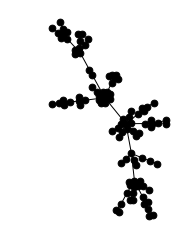

In [46]:
fig = plt.figure()
axs = fig.add_subplot(111, aspect="equal")
axs.axis("off")
nx.draw_networkx_edges(G, coord) #visualize the edges
nx.draw_networkx_nodes(G, coord, node_size=45, node_color="k") #visualize the nodes
plt.show()

Based on the graph shown above, we can see several clusters. 

The first step is to create the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) using the [`adjacency_matrix`] function (see [here](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html)).

In [65]:
%%latex

\begin{equation}
A_{ij} = 
    \begin{cases}
    1, & \text{if } (v_i, v_j) \in E\\
    0, & \text{otherwise}
    \end{cases}
\end{equation}

<IPython.core.display.Latex object>

In [73]:
A = nx.adjacency_matrix(G)

The next step is to calculate the [Laplacian Matrix](https://en.wikipedia.org/wiki/Laplacian_matrix). We first calculate D, which is the [degree matrix](https://en.wikipedia.org/wiki/Degree_matrix), and then the L can be calculated as the subtraction of A from D.

In [72]:
%%latex

\begin{equation}
D_{ij} = 
    \begin{cases}
    \deg(v_i),& \text{if } i = j\\
    0, & \text{otherwise}
    \end{cases}
\end{equation}

\begin{equation}
L = D - A
\end{equation}

<IPython.core.display.Latex object>

In [74]:
D = np.diag(np.ravel(np.sum(A,axis=1)))
L = D - A

Let's visualize D and L:

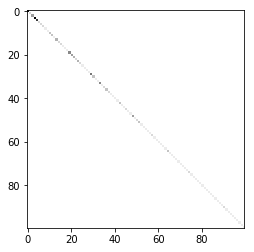

In [77]:
plt.imshow(D, cmap='binary')
plt.show()

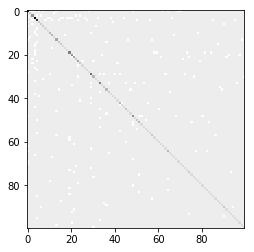

In [78]:
plt.imshow(L, cmap='binary')
plt.show()

Then we use the `numpy.linalg.eigh` function to get the eigen values and eigenvectors of L in ascending order. 

The second eigenvector (the Fiedler vector) can be achieved as `U[:, 1]` where `U` is the eiven vector matrix.

In [79]:
l, U = la.eigh(L)
f = U[:,1]

The Fiedler vector can be used to classify the data into different categories. A simple way is to do a binary classification based on the sign of each value:

In [81]:
labels = np.ravel(np.sign(f))

Let's plot the classification result.

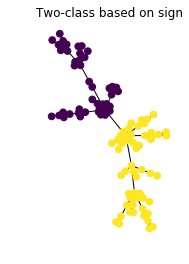

In [87]:
fig = plt.figure()
axs = fig.add_subplot(111, aspect="equal")
axs.axis("off")
nx.draw_networkx_edges(G, coord)
nx.draw_networkx_nodes(G, coord, node_size=45,node_color=labels)
plt.title("Two-class based on sign")
plt.show()

It's very simple to perform clustering using other methods such as [K-means](https://en.wikipedia.org/wiki/K-means_clustering), and we can specify how many classes to output.

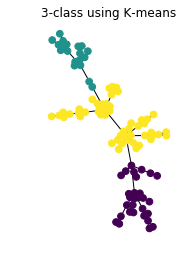

In [89]:
k = 3
means, labels = vq.kmeans2(U[:,1:k], k)

fig = plt.figure()
axs = fig.add_subplot(111, aspect="equal")
axs.axis("off")
nx.draw_networkx_edges(G, coord)
nx.draw_networkx_nodes(G, coord, node_size=45,node_color=labels)
plt.title("3-class using K-means")
plt.show()

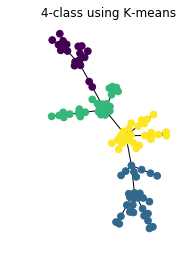

In [95]:
k = 4
means, labels = vq.kmeans2(U[:,1:k], k)

fig = plt.figure()
axs = fig.add_subplot(111, aspect="equal")
axs.axis("off")
nx.draw_networkx_edges(G, coord)
nx.draw_networkx_nodes(G, coord, node_size=45,node_color=labels)
plt.title("4-class using K-means")
plt.show()